# User Guide for Training and Running Inference with the LiteLoc Model

This guide explains how to train and run inference with the LiteLoc model on your device, using your own parameters. Alternatively, you can use the provided demo dataset (available online) and the default parameters from the **.yaml** file to run the training process. Both training and inference should be executed in a Python environment with the dependencies listed in the provided **requirements.txt** file. For ease of setup, we recommend using **Anaconda** to create and manage the required environment.

* conda create -n liteloc_env python
* conda activate liteloc_env
* pip install -r requirments.txt
* conda install -c turagalab -c conda-forge spline

## Parameter setting
Before starting the training process, you need to initialize the parameters. These parameters can be divided into three categories:
1. Camera settings
2. PSF initialization
3. Training configuration

In [ ]:
import os
from utils.gui_utils import *
from utils.help_utils import *
params_dict = {}

_Camera settings :_

In [2]:
params_dict['Camera'] = Camera_GUI()

_PSF initialization :_

In [3]:
params_dict['PSF_model'] = PSF_GUI()

_Training configuration :_

In [4]:
params_dict['Training'] = Training_GUI()

All saved parameters for subsequent training will be converted to **types.SimpleNamespace** format for consistent access and management. These parameters can be saved and reloaded for future use.
1. Presenting and Transferring Parameter Data:

In [5]:
print(show_confirming_string(params_dict))

params = dict_to_namespace(params_dict)

--Camera :
camera : sCMOS
em_gain : 1.0
surp_p : 0.5
qe : 0.95
spurious_c : 0.002
sig_read : 1.535
e_per_adu : 0.7471
baseline : 100.0
--PSF_model :
z_scale : 700.0
simulate_method : spline
--spline_psf :
calibration_file : None
psf_extent : [[-0.5, 63.5], [-0.5, 63.5], None]
device_simulation : cuda
--vector_psf :
objstage0 : -500.0
zemit0 : None
zernikefit_file : None
pixelSizeX : 110
pixelSizeY : 110
psfSizeX : 51
NA : 1.5
wavelength : 680.0
refmed : 1.406
refcov : 1.524
refimm : 1.518
zernikefit_map : None
psfrescale : 0.5
Npupil : 64
--Training :
max_epoch : 50
eval_iteration : 500
batch_size : 16
valid_frame_num : 100
em_per_frame : 10
train_size : [64, 64]
photon_range : [4000, 40000]
result_path : None
infer_data : None
bg : None
perline_noise : True
pn_factor : 0.2
pn_res : 64
factor : None
offset : None
model_init : None
project_name : LiteLoc-main



2. Saving Parameters:

In [3]:
# Paramter save

# import tkinter as tk
# from tkinter import filedialog
# import os

# root = tk.Tk()
# root.withdraw()

# top = tk.Toplevel(root)
# top.wm_attributes("-topmost", 1)
# top.withdraw()

# folder_path = filedialog.askdirectory(
#     title = "Select folder path",
#     initialdir = os.getcwd(),#os.path.join(os.getcwd(), 'demo'),
#     parent = top
# )
# root.destroy()

# file_name = input()
# if file_name[-5:] != '.yaml':
#     file_name += '.yaml'


# yaml_file_path = os.path.join(folder_path, file_name)

# print("Parameter file:", yaml_file_path)


# import yaml
# with open(yaml_file_path, 'w') as yaml_file:
#     yaml.dump(params_dict, yaml_file, sort_keys=False, default_flow_style=False)

yaml_file_folder = select_path('folder')

file_name = input()
if file_name[-5:] != '.yaml': 
    file_name += '.yaml'
    
yaml_file_path = os.path.join(yaml_file_folder, file_name)
save_yaml(params, yaml_file_path)

print("File saved as : {}".format(yaml_file_path))

 test2


File saved as : E:/Torch/LiteLoc\test2.yaml


## Pre-train test:
To run the training code, you can either use the parameter file you defined earlier or the demo setting files listed below. To do so, execute the following code:
 - demo/demo-fig3a/train_params_demo_fig3a.yaml
 - demo/demo-fig3d/train_params_demo_fig3d.yaml
 - demo/demo-uipsf/train_params_demo_uipsf.yaml

In [5]:
# root = tk.Tk()
# root.withdraw()

# top = tk.Toplevel(root)
# top.wm_attributes("-topmost", 1)
# top.withdraw()

# file_path = filedialog.askopenfilename(
#     title="Select file",
#     initialdir=os.getcwd(),
#     parent=top,
#     filetypes=[
#         ("All files", "*.*"),
#         ("Text files", "*.txt"),
#         ("Python files", "*.py"),
#         ("Image files", "*.jpg *.png *.gif")
#     ]
# )

# root.destroy()

yaml_file_path = select_path('file')

print("File selected : ", yaml_file_path)

params= load_yaml_train(yaml_file_path)
print(show_confirming_string(namespace_to_dict(params)))

File selected :  E:/Torch/LiteLoc/demo/demo-fig3a/infer_params_demo_fig3a.yaml
--Loc_Model :
model_path : ../../results/liteloc_fig3a/checkpoint.pkl
--Multi_Process :
image_path : ../../datasets/NPC_U2OS_Astigmatism_PSF_640_40mw_20ms_256_2/
save_path : ../../datasets/NPC_U2OS_Astigmatism_PSF_640_40mw_20ms_256_2/liteloc_fig3a_result.csv
time_block_gb : 1
batch_size : 30
sub_fov_size : 256
over_cut : 8
multi_gpu : True
num_producers : 1



In [7]:
# file_path ='demo/demo-fig3a/train_params_demo_fig3a.yaml'
# params= load_yaml_train(file_path)

### Viewing the Point Spread Function
You can examine the Point Spread Function (PSF) used for dataset simulation when training the LiteLoc model. The PSF is represented in three dimensions and displayed as a 21-channel 2D image stack.

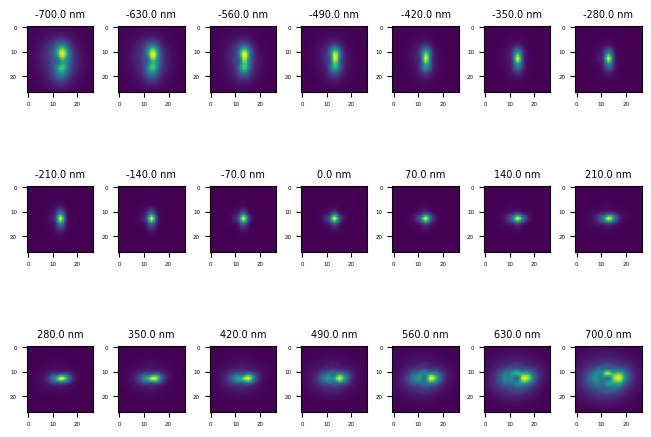

In [22]:
from utils.visual_utils import show_sample_psf
show_sample_psf(psf_pars=params.PSF_model, train_pars=params.Training)

### Displaying Simulated Images
Below are examples of the dataset simulation process. The ground truth of the lateral locations of emitters is shown at the top. The simulated images are then synthesized based on the random selected emitter locations and the 3D PSF presented above.

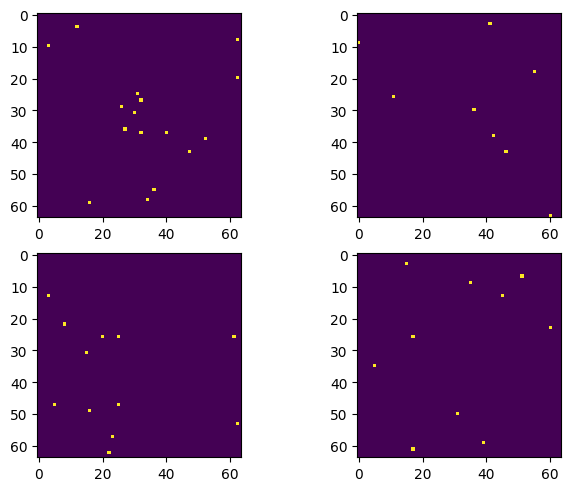

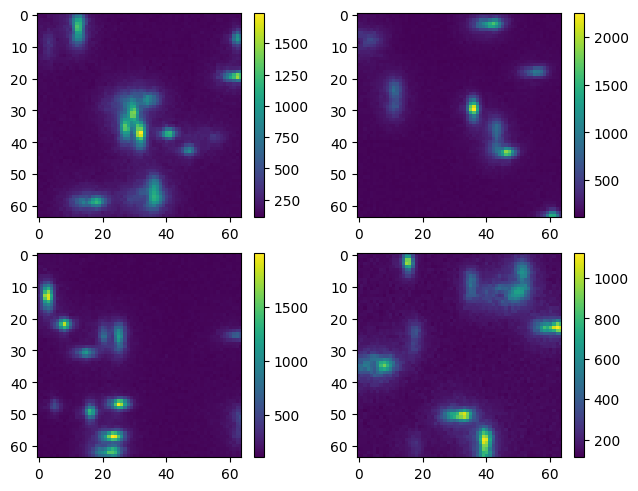

In [23]:
from utils.visual_utils import show_train_img
show_train_img(image_num=4, camera_params=params.Camera, psf_params=params.PSF_model, train_params=params.Training)

## Train Your LiteLoc Model
To train the LiteLoc model, use the <span style="background-color: lightgrey;"> _liteloc_train_demo.py_  </span> script along with the parameter file you saved or one provided by us. The command for training the LiteLoc model in the terminal is shown below. Replace <span style="background-color: lightgrey;"> [_folder\\parameter_file_name.yaml_] </span>  with the path to the parameter file you selected.

In [ ]:
! python liteloc_train_demo.py --train_params_path [folder\parameter_file_name.yaml]

## Model Inference
Similar to the training process, parameter setting is the first step to apply the pre-trained model. As single molecule localization (**SMLM**) technology involves a temporal and spatial trade-off, the number of input image frames is typically large when implementing 3D localization and synthesizing 3D super-resolution images. Device settings play a key role in accelerating the inference process. To define your own parameters, use the following code, similar to the one provided above.

In [ ]:
from utils.gui_utils import Infer_GUI
infer_params_dict = Infer_GUI()

print(show_confirming_string(infer_params_dict))

infer_params = dict_to_namespace(infer_params_dict)

Alternatively, to run the pre-trained model we provided, you can load the parameter files stored in the demo folder, along with the downloaded model and dataset. The parameter files are listed below:
 - demo\\demo-fig3a\\infer_params_demo_fig3a.yaml
 - demo\\demo-fig3d\\infer_params_demo_fig3d.yaml

In [8]:
from utils.help_utils import load_yaml_infer 
infer_params= load_yaml_infer('demo/demo-fig3a/infer_params_demo_fig3a.yaml')
print(infer_params)

The inference process for the LiteLoc model is implemented in the Python script <span style="background-color: lightgrey;"> liteloc_train_demo.py </span>, along with the selected parameter file. The command is shown below. Replace <span style="background-color: lightgrey;"> [folder\\\\parameter_file_name.yaml] </span> with the path to the parameter file you selected.

In [ ]:
! python liteloc_train_demo.py --infer_params_path [folder\parameter_file_name.yaml]